In [1]:
!pip install nltk

In [4]:
!pip install autocorrect

  Created wheel for autocorrect: filename=autocorrect-2.5.0-py3-none-any.whl size=621862 sha256=135d52e6b20a4e2867434a034a3a6771d03bfac1e198390405da02c496eded64
  Stored in directory: c:\users\shrish sharma\appdata\local\pip\cache\wheels\da\03\6e\62a48359ab630e39939dbb392cc079923bb77664e97a47645d
Successfully built autocorrect


In [15]:
!pip install wordcloud

In [1]:
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re

In [2]:
data = pd.read_csv(r'spam.csv')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [7]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# VISUALIZATION of SPAM WORDS 

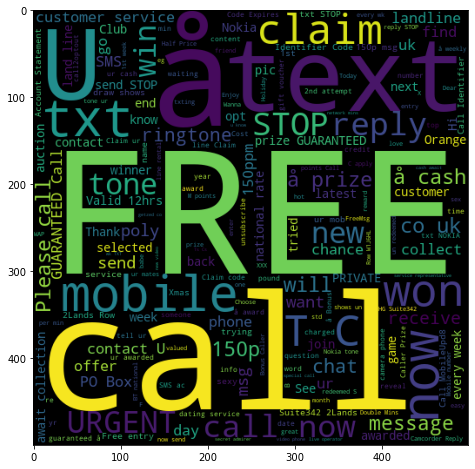

In [8]:
spam_words = ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc = WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# VISUALIZATION of HAM WORDS 

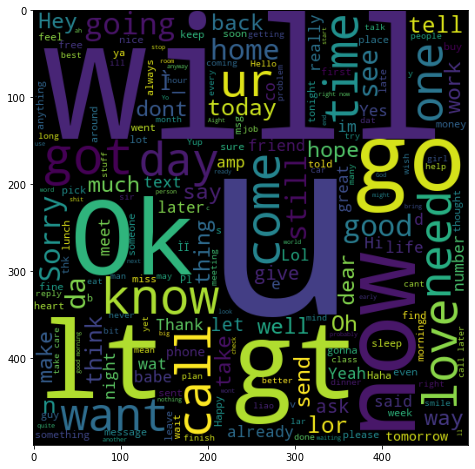

In [9]:
spam_words = ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc = WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# PREpROCESS DATA

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Shrish
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
txt="HI this is Shrish"
wt(txt)

['HI', 'this', 'is', 'Shrish']

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Shrish
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabetic characters
    lines=re.sub('[^A-Za-z]',' ',lines)
    #Lowering every word
    lines=lines.lower()
    #tokenization
    tokenized_lines=wt(lines)
    
    #removing stop words and stemming
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
        

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [08:40<00:00, 10.70it/s]


In [20]:
# Encoding Labels

data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [23]:
Y = data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

# Train test split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

# VECTORIZATION

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
matrix=CountVectorizer()

In [26]:
#Converting words to vectors
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

# LET'S Train our Model - Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [28]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [29]:
model.class_count_

array([3623.,  556.])

In [32]:
Y_pred=model.predict(X_test_vect)

In [33]:
Y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
accuracy_score(Y_test,Y_pred)*100

86.50394831299354

In [36]:
confusion_matrix(Y_test,Y_pred)

array([[1042,  160],
       [  28,  163]], dtype=int64)